In [3]:
import os
import urllib
import urllib.request
import zipfile


if not os.path.isfile('.zip'):
    urllib.request.urlretrieve("https://github.com/Mouneshgouda/Brain-Tumor-Data-Set/archive/refs/heads/main.zip","cancer.zip")

    zip_flename ="cancer.zip"
    with zipfile.ZipFile("cancer.zip","r") as zip_ref:
        zip_ref.extractall(".")



In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Config
IMG_SIZE = 64
BATCH_SIZE = 32

# Updated Paths for Brain Tumor Dataset
train_path = "/content/Brain-Tumor-Data-Set-main/Brain Tumor Data Set/Test"
val_path = "/content/Brain-Tumor-Data-Set-main/Brain Tumor Data Set/Train"

# Data Loaders
train_data = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_data = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(train_data, epochs=5, validation_data=val_data)

Found 950 images belonging to 2 classes.
Found 3903 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.5232 - loss: 0.9014

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 608ms/step - accuracy: 0.5254 - loss: 0.8960 - val_accuracy: 0.6152 - val_loss: 0.6365
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 567ms/step - accuracy: 0.6669 - loss: 0.5931 - val_accuracy: 0.6344 - val_loss: 0.5969
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 556ms/step - accuracy: 0.7346 - loss: 0.5186 - val_accuracy: 0.7620 - val_loss: 0.4995
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 944ms/step - accuracy: 0.7965 - loss: 0.4290 - val_accuracy: 0.7748 - val_loss: 0.4557
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 602ms/step - accuracy: 0.8582 - loss: 0.3404 - val_accuracy: 0.7973 - val_loss: 0.4555


Saving braintumorimage.jpg to braintumorimage (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


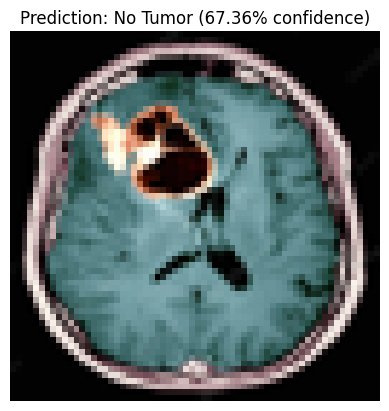

In [5]:
# Upload and Predict

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

# Config (added IMG_SIZE definition)
IMG_SIZE = 64

uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name
    img = Image.open(img_path).resize((IMG_SIZE, IMG_SIZE))

    # Convert grayscale to RGB if needed
    if img.mode != 'RGB':
        img = img.convert('RGB')

    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediction
    prediction = model.predict(img_array)[0][0]
    label = "Tumor Detected" if prediction > 0.5 else "No Tumor"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    # Show Result
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {label} ({confidence:.2%} confidence)")
    plt.show()